# Инициализация

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка первичных данных

Загружаем первичные данные из файлов:
- datasets/category_tree.csv
- datasets/events.csv
- datasets/item_properties_part1.csv
- datasets/item_properties_part2.csv

In [4]:
# Базовая информация

def base_info_about_dataset(
        df: pd.DataFrame,
        duplucated_columns=None,
        unique_columns=None,
        nunique_columns=None,
):
    display(df.head())
    print(f"\ndf.shape: {df.shape} \n")
    print(f"df.info(): \n{df.info()} \n")
    print(f"df.isna().sum(): \n{df.isna().sum()} \ndf.describe():")
    display(df.describe())
    
    if duplucated_columns:
        duplicated_mask = df.duplicated(subset=duplucated_columns)
        print(f"\nDuplicated rows: {duplicated_mask.sum()}")
        display(df[duplicated_mask].sort_values(duplucated_columns).head())
    
    if unique_columns:
        print("\n unique")
        for item in unique_columns:
            print(f"{item}: {df[item].unique()}")

    if nunique_columns:
        print("\n nunique")
        for item in nunique_columns:
            print(f"{item}: {df[item].nunique()}")
    

### df_tree

In [5]:
df_tree = pd.read_csv('datasets/category_tree.csv')
base_info_about_dataset(
    df_tree, 
    duplucated_columns=['categoryid', 'parentid'],
    nunique_columns=['categoryid', 'parentid']
)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0



df.shape: (1669, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
df.info(): 
None 

df.isna().sum(): 
categoryid     0
parentid      25
dtype: int64 
df.describe():


,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000



Duplicated rows: 0


,categoryid,parentid



 nunique
categoryid: 1669
parentid: 362


#### Вывод: 
1. В датасете есть пропущенные значения: думаю это связано с тем, что все товары разделены на 25 основных групп. Например: "Одежда", "Для животных", "Красота и здоровье" и тд
2. Родительских категорий в 4,5 раз меньше, чем дочерних

### df_events

In [6]:
df_events = pd.read_csv('datasets/events.csv')
base_info_about_dataset(
    df_events, 
    duplucated_columns=['visitorid', 'itemid', 'event'],
    unique_columns=['event']
)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



df.shape: (2756101, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
df.info(): 
None 

df.isna().sum(): 
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64 
df.describe():


,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000



Duplicated rows: 540679


,timestamp,visitorid,event,itemid,transactionid
742485,1438971463170,2,view,216305,NaN
735273,1438970013790,2,view,325215,NaN
742616,1438969904567,2,view,325215,NaN
737615,1438970905669,2,view,342816,NaN
1130169,1440917649385,6,view,344723,NaN



 unique
event: ['view' 'addtocart' 'transaction']


In [7]:
df_events.query("event == 'transaction'").isna().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64

In [8]:
df_events_c = df_events.groupby(
    ['itemid', 'event'],
    as_index=False
).agg({'visitorid': ['nunique', 'count']})

df_events_c.columns = df_events_c.columns.droplevel(level=0)
df_events_c.columns = ['itemid', 'event', 'nunique_visitor', 'count_visitor']

In [9]:
df_events_c.head()

,itemid,event,nunique_visitor,count_visitor
0,3,view,2,2
1,4,view,3,3
2,6,view,26,29
3,9,view,2,2
4,15,addtocart,2,3


In [10]:
df_events_c.query("event == 'view'")['nunique_visitor'].quantile([item * 0.1 for item in range(1, 10)])

0.1     1.0
0.2     1.0
0.3     1.0
0.4     2.0
0.5     2.0
0.6     4.0
0.7     6.0
0.8     9.0
0.9    20.0
Name: nunique_visitor, dtype: float64

In [11]:
df_events_c = df_events.groupby(
    ['visitorid', 'event'],
    as_index=False
).agg({'itemid': ['nunique', 'count']})

df_events_c.columns = df_events_c.columns.droplevel(level=0)
df_events_c.columns = ['visitorid', 'event', 'nunique_item', 'count_item']

In [12]:
df_events_c.query("event == 'view'")['count_item'].quantile([item * 0.1 for item in range(1, 10)])

0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    1.0
0.7    1.0
0.8    2.0
0.9    3.0
Name: count_item, dtype: float64

In [13]:
df_events_c.query("event == 'addtocart'")['count_item'].quantile([item * 0.1 for item in range(1, 10)])

0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    1.0
0.7    1.0
0.8    2.0
0.9    3.0
Name: count_item, dtype: float64

,visitorid,n_viewed_items
0,0,3
1,1,1
2,2,4
3,3,1
4,4,1


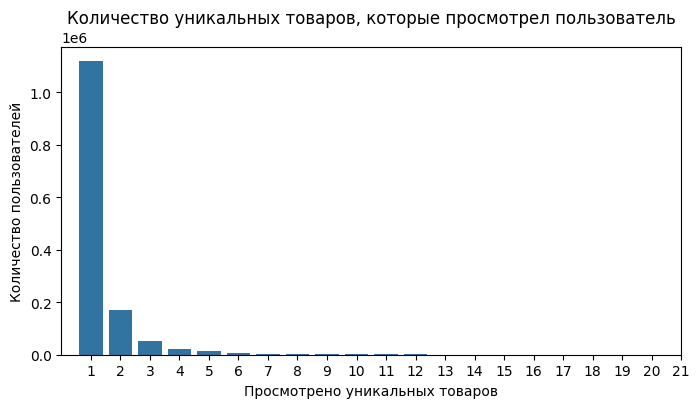

In [37]:
# количество просмотренных товаров пользователями

# Группируем по пользователю и считаем количество уникальных просмотренных товаров
df_views_per_visitor = df_events[df_events['event'] == 'view']\
    .groupby('visitorid', as_index=False)['itemid']\
    .nunique()\
    .rename(columns={'itemid': 'n_viewed_items'})


display(df_views_per_visitor.head())

plt.figure(figsize=(8, 4))
sns.countplot(
    df_views_per_visitor,
    x='n_viewed_items'
)
plt.xlim([-1, 20])
plt.title('Количество уникальных товаров, которые просмотрел пользователь')
plt.xlabel('Просмотрено уникальных товаров')
plt.ylabel('Количество пользователей')

plt.savefig('./EDA/views_item_by_user_counts.png')
plt.show()

#### Выводы:
1. transactionid - много пропущенных значений (не все записи связаны с транзакциями, это норма)
2. Duplicated rows: 540679 по колонкам ['visitorid', 'itemid', 'event'] => пользователи могут несколько раз совершать целевое действие с товарим
3. Необходимо доисследовать: существуют ли товары с которыми не взаимодействовали пользователи/мало взаимодействовали (удалить эти данные из датасета, чтобы облегчить процесс обучения)
4. В колонках timestamp	visitorid	event	itemid пропусков не обнаружено
5. Большая часть пользователей просмотрели/положили в корзину только 1 товар (более 70 процентов из тех кто положил товар в карзину сдалал это только 1 раз)
6. Около 30 % товаров было просмотрено только 1 человеком
7. Большинство пользователей просмотрели до 5 товаров

### item_properties_part

In [14]:
df_item_properties_part1 = pd.read_csv('datasets/item_properties_part1.csv')


In [15]:
base_info_about_dataset(
    df_item_properties_part1, 
    duplucated_columns=['itemid', 'property', 'value'],
    nunique_columns=['property', 'itemid']
)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513



df.shape: (10999999, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB
df.info(): 
None 

df.isna().sum(): 
timestamp    0
itemid       0
property     0
value        0
dtype: int64 
df.describe():


,timestamp,itemid
count,1.100000e+07,1.100000e+07
mean,1.435158e+12,2.333851e+05
std,3.327653e+09,1.348258e+05
min,1.431227e+12,0.000000e+00
25%,1.432436e+12,1.165150e+05
50%,1.433646e+12,2.334990e+05
75%,1.437880e+12,3.501860e+05
max,1.442113e+12,4.668660e+05



Duplicated rows: 3957935


,timestamp,itemid,property,value
2604501,1431226800000,0,6,1152934 1238769
2803284,1437274800000,0,6,1152934 1238769
3002067,1433646000000,0,6,1152934 1238769
3200850,1436670000000,0,6,1152934 1238769
3399633,1436065200000,0,6,1152934 1238769



 nunique
property: 1097
itemid: 417053


In [16]:
df_item_properties_part2 = pd.read_csv('datasets/item_properties_part2.csv')

In [17]:
base_info_about_dataset(
    df_item_properties_part2, 
    duplucated_columns=['itemid', 'property'],
    nunique_columns=['property', 'itemid']
)

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062



df.shape: (9275903, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB
df.info(): 
None 

df.isna().sum(): 
timestamp    0
itemid       0
property     0
value        0
dtype: int64 
df.describe():


,timestamp,itemid
count,9.275903e+06,9.275903e+06
mean,1.435156e+12,2.333968e+05
std,3.327970e+09,1.348682e+05
min,1.431227e+12,0.000000e+00
25%,1.432436e+12,1.165175e+05
50%,1.433646e+12,2.334620e+05
75%,1.437880e+12,3.504470e+05
max,1.442113e+12,4.668660e+05



Duplicated rows: 3701920


,timestamp,itemid,property,value
347082,1436065200000,1,888,172646
545865,1437879600000,1,888,172646
744648,1439694000000,1,888,172646
943431,1435460400000,1,888,172646
1142214,1436670000000,1,888,172646



 nunique
property: 1094
itemid: 417053


In [18]:
df_item_properties_part2.query("itemid == 17166").sort_values('timestamp').head(20)

,timestamp,itemid,property,value
4806888,1431226800000,17166,283,21558 737728 91920 657999 1251622 1097511 1128...
3191220,1431226800000,17166,764,1285872
4374523,1431226800000,17166,227,21558
5204506,1431226800000,17166,888,91920
7421489,1431226800000,17166,790,n539880.000
5403289,1431831600000,17166,888,91920
5490142,1432436400000,17166,813,769062
2523456,1432436400000,17166,categoryid,373
5602072,1432436400000,17166,888,91920 59972
7429730,1432436400000,17166,839,737728


In [19]:
sorted(list(df_item_properties_part2.property.unique()))[-5:]

['997', '998', '999', 'available', 'categoryid']

In [20]:
df_item_properties_part2.query("property == 'categoryid'").head()

,timestamp,itemid,property,value
15,1431226800000,8921,categoryid,1188
70,1433041200000,122405,categoryid,769
162,1439089200000,225336,categoryid,491
182,1435460400000,193256,categoryid,1261
257,1431226800000,301841,categoryid,1493


In [21]:
items_1 = set(df_item_properties_part1["itemid"].unique())
items_2 = set(df_item_properties_part2["itemid"].unique())

print(
    len(items_1.difference(items_2)), 
    len(items_2.difference(items_1))
)

0 0


In [22]:
timestamp_min_1 = df_item_properties_part1["timestamp"].min()
timestamp_min_2 = df_item_properties_part2["timestamp"].min()

timestamp_max_1 = df_item_properties_part1["timestamp"].max()
timestamp_max_2 = df_item_properties_part2["timestamp"].max()

if timestamp_min_1 > timestamp_max_2 or timestamp_min_2 > timestamp_max_1:
    print("Нет пересечений")
else:
    print("Есть пересечения по времени")

Есть пересечения по времени


### Выводы: 
1. timestamp — временная метка добавления свойства. 
2. Свойства товаров могут изменяться со временем
3. Среди свойств есть два типа свойств, которые выбиваются из общей массы: 'available', 'categoryid'. Скорее всего available - отвечает за доступность товара, categoryid - за категорию товара. 
4. value - не всегда представляет из себя только 1 число, иногда value - это список чисел, которые перечислены через пробел 
5. itemid полностью пересекаются в df_item_properties_part1 и df_item_properties_part2
6. Судя по данным можно задать товару разные параметры, но не активировать его
7. Убрала из датасета данные о товарах, которые не были активированы

ToDo:
1. Исключить товары, которые никогда не были доступны
2. При таргетной выдачи исключать недоступные товары
3. Преобразовать данные: 
    - создать отдельную клонку с 'available', 'categoryid'
4. Данных внутри property слишком много - 1000 числовых значений, пока не понятно как они пригодятся при дальнейшем анализе. Предполагаю, что это кодирование категориальных переменных и брать от них какие-то математические функции не выжу смысла. Можно попробовать оставить топ 5 проперти для каждой категории


In [23]:
import gc

df_item_properties_all = pd.concat([df_item_properties_part1, df_item_properties_part2])

del df_item_properties_part1
del df_item_properties_part2
del items_1, items_2
gc.collect()

df_item_properties_all.sort_values(by=['timestamp', 'itemid'], inplace=True)

In [24]:
df_item_properties_all.shape

(20275902, 4)

In [25]:
df_is_available_item = df_item_properties_all.query("property == 'available' and value == '1'")\
    .drop_duplicates(subset=['itemid'], keep='first')

df_item_final = df_item_properties_all.merge(
    df_is_available_item[['itemid']],
    on=['itemid'],
    how='inner'
)

In [26]:
df_item_final.shape

(6023101, 4)

In [41]:
df_item_final.head()

,timestamp,itemid,property,value
0,1431226800000,1,790,n5760.000
1,1431226800000,1,available,1
2,1431226800000,1,776,379040
3,1431226800000,1,categoryid,1114
4,1431226800000,1,888,172646


Уберем из ивентов события, которые происходили с недоступными товарами

In [46]:
itemid_unique = df_item_final.itemid.unique()
base_len_events = df_events.shape[0]
print(base_len_events)

df_events_avalible = df_events[df_events.itemid.isin(itemid_unique)]
len_events = df_events_avalible.shape[0]
print(len_events)

print(round((base_len_events - len_events) / base_len_events * 100, 2))


2756101
1720629
37.57


Количество ивентов сократилось на 37 процентов. Далее будем использовать ивенты, из отобранной выборки  
Сохраним промежуточный результат

In [52]:
df_events_avalible.to_parquet("./datasets/events_avalible.parquet")
df_item_final.to_parquet("./datasets/item_properties_avalible.parquet")


# Преобразуем df_item_properties

1. создать отдельную клонку с 'available', 'categoryid'
2. для каждой категории выберем топ 5 (или 10) проперти и составим словари из этих значений
3. Создадим отдельную колонку с родительской катигорией
4. Попробуем вытянуть из дерева "основную" родительскую категорию 

## Топ 5 проперти

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_tree = pd.read_csv('datasets/category_tree.csv')
df_item = pd.read_parquet('datasets/item_properties_avalible.parquet')
df_events = pd.read_parquet('datasets/events_avalible.parquet')

In [14]:
import pandas as pd
import numpy as np

df_tree['parentid'] = df_tree['parentid'].astype('Int64')

# Создадим быстрый lookup словарь: category -> parent
parent_map = dict(zip(df_tree['categoryid'], df_tree['parentid']))

def find_root(category_id):
    """
    Идём вверх по цепочке parentid, пока не встретим категорию без родителя.
    """
    current = category_id
    visited = set()

    while current in parent_map and not pd.isna(parent_map[current]):
        if current in visited:
            # На случай циклов
            break
        visited.add(current)

        current = parent_map[current]

    return int(current)

# Формируем словарь: categoryid -> root_parent
root_parent = {int(cat): find_root(cat) for cat in df_tree['categoryid']}



In [31]:
df_parent = df_item.query("property == 'categoryid'").copy()
df_parent['parent_0'] = df_parent.value.apply(lambda x: root_parent[int(x)])
df_parent.drop_duplicates(['itemid', 'property'], inplace=True)

In [32]:
df_item_parent = df_item.merge(
    df_parent[['itemid', 'parent_0']],
    how='left',
    on='itemid'
)

In [40]:
ALVAYS_KEEP = ['available', 'categoryid']
N_TOP = 10

# Функция для получения топ-10 property для каждого parent_0
def get_top_properties(group):
    # Отфильтруем всегда оставляемые property
    filtered = group[~group['property'].isin(ALVAYS_KEEP)]
    # Посчитаем частоты
    top_props = filtered['property'].value_counts().nlargest(N_TOP).index.tolist()
    # Добавим всегда оставляемые property
    top_props.extend(ALVAYS_KEEP)
    return top_props

# Создаем словарь parent_0 -> топ property
top_properties_dict = df_item_parent.groupby('parent_0').apply(get_top_properties).to_dict()

# Функция для фильтрации датасета
def filter_top_properties(row):
    return row['property'] in top_properties_dict[row['parent_0']]

# Фильтруем датасет
filtered_df = df_item_parent[df_item_parent.apply(filter_top_properties, axis=1)].reset_index(drop=True)


In [47]:
# Разделим на числовые и специальные property
special_props = ['available', 'categoryid']
numerical_df = filtered_df[~filtered_df['property'].isin(special_props)]
special_df = filtered_df[filtered_df['property'].isin(special_props)]

# 1) Для каждой даты создаем словарь {property: value} для числовых property
num_dict_df = numerical_df.groupby(['timestamp', 'itemid']).apply(
    lambda x: dict(zip(x['property'], x['value']))
).reset_index(name='num_properties')

# 2) Создаем столбец available по дате
available_df = special_df[special_df['property'] == 'available'].groupby(['timestamp', 'itemid'])['value'].first().reset_index()
available_df.rename(columns={'value': 'available'}, inplace=True)

# 3) Создаем столбец categoryid по дате
category_df = special_df[special_df['property'] == 'categoryid'].groupby(['timestamp', 'itemid'])['value'].first().reset_index()
category_df.rename(columns={'value': 'categoryid'}, inplace=True)

# Объединяем все в один датафрейм
df_intermediate = num_dict_df.merge(available_df, on=['timestamp', 'itemid'], how='left')\
    .merge(category_df, on=['timestamp', 'itemid'], how='left')


In [51]:
df = df_intermediate.copy()

# Сортируем по itemid и timestamp
df = df.sort_values(['itemid', 'timestamp']).reset_index(drop=True)

# Функция для накопления словаря и заполнения NaN
def forward_fill_group(group):
    last_num_props = {}
    last_available = None
    last_categoryid = None

    numeric_props_list = []
    available_list = []
    categoryid_list = []

    for _, row in group.iterrows():
        # Обновляем словарь num_properties
        current_props = row['num_properties']
        if current_props is None:
            current_props = {}
        merged_props = last_num_props.copy()
        merged_props.update(current_props)
        numeric_props_list.append(merged_props)
        last_num_props = merged_props

        # Заполняем available
        if pd.notna(row['available']):
            last_available = row['available']
        available_list.append(last_available)

        # Заполняем categoryid
        if pd.notna(row['categoryid']):
            last_categoryid = row['categoryid']
        categoryid_list.append(last_categoryid)

    group['num_properties'] = numeric_props_list
    group['available'] = available_list
    group['categoryid'] = categoryid_list
    return group

# Применяем функцию к каждой группе itemid
df_filled = df.groupby('itemid', group_keys=False).apply(forward_fill_group)

# Создаем valid_from и valid_to
df_filled['valid_from'] = df_filled['timestamp']
df_filled['valid_to'] = df_filled.groupby('itemid')['timestamp'].shift(-1)  # следующая запись
df_filled['valid_to'] = df_filled['valid_to'].fillna(pd.Timestamp.max)  # для последней записи

# Сохраняем только нужные колонки
df_final = df_filled[['itemid', 'num_properties', 'available', 'categoryid', 'valid_from', 'valid_to']]

display(df_final.head())


KeyboardInterrupt: 

In [ ]:
df_final.to_parquet("./datasets/properties_final.parquet")

## Полный путь до родителей

In [ ]:
import pandas as pd
import numpy as np

def build_parent_map(df):
    """
    Создаёт словарь: categoryid → [parentids]
    Parentid может быть несколько.
    """
    parent_map = {}
    for cat, parent in zip(df['categoryid'], df['parentid']):
        if pd.isna(parent):
            parent_map[cat] = []
        else:
            parent_map.setdefault(cat, [])
            parent_map[cat].append(int(parent))
    return parent_map


def get_parents_chain(category, parent_map, max_depth=5):
    """
    Возвращает список родителей от уровня 0 до max_depth.
    Учитывает несколько parentid.
    """
    levels = []
    current = [category]

    for _ in range(max_depth):
        next_parents = []
        for c in current:
            parents = parent_map.get(c, [])
            next_parents.extend(parents)

        if not next_parents:
            break

        levels.append(next_parents)
        current = next_parents

    return levels


def is_root(category, parent_map):
    """Является ли категория корнем."""
    return len(parent_map.get(category, [])) == 0


def path_length(chain):
    """Длина пути до корня (глубина дерева)."""
    return len(chain)


In [ ]:
parent_map = build_parent_map(df)

rows = []

for cat in df['categoryid']:
    chain = get_parents_chain(cat, parent_map, max_depth=5)

    row = {
        "categoryid": cat,
        "is_root": is_root(cat, parent_map),
        "path_length": path_length(chain)
    }

    # Добавляем уровни 1..5
    for level in range(5):
        if level < len(chain):
            row[f"parent_level_{level+1}"] = chain[level]
        else:
            row[f"parent_level_{level+1}"] = None

    rows.append(row)

result = pd.DataFrame(rows)
result
